In [599]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

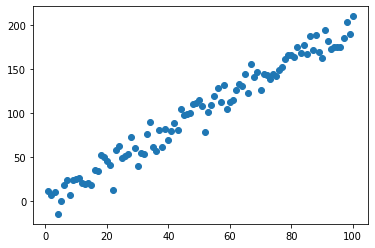

In [600]:
m = 2    #y=mx+c
c = 1
x = np.arange (1 , 101 , 1)     #1 to 6 incrementing by 1
# print('x =',x)

sigma = 10
np.random.seed(20)    #https://likegeeks.com/numpy-random-seed/  <-----  to learn about random.seed
noise = sigma * np.random.randn(len(x))
# print("Noise =" , noise)

o = np.zeros(x.shape)
y = m*x +c + noise + o
# print("Y = ", y)

plt.plot(x,y,'o')
plt.show()

In [601]:
def perpendicular_distance(point_x,point_y,m_line, c_line):
    return np.abs((m_line*point_x + c_line - point_y)/(np.sqrt(m_line**2 + 1)))

In [602]:
p = 0.99
s = 2
e = 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))

In [603]:
total_points = len(x)
best_m = 0
best_c = 0

for i in range(N):
    while True:
        a,b =np.random.randint(N, size=(2))
        if a!=b: break
        
    point_1_x = x[a]
    point_1_y = y[a]

    point_2_x = x[b]
    point_2_y = y[b]

    m = (point_2_y - point_1_y)/(point_2_x-point_1_x)
    c = point_2_y - m*point_2_x
    y2 = m*x+c


    inliers, outliers = 0,0
    for j in range(total_points):
        d = perpendicular_distance(x[j],y[j],m,c)
        if d<5:
            inliers += 1
           
        else: 
            outliers +=1

    outlier_percentage = outliers/total_points
    # print('in= ',inliers,'out=',outliers,'perce=',outlier_percentage,m,c)
    # print(round(outlier_percentage,2))
    if outlier_percentage <= e:
        best_m = m
        best_c = c
        e = outlier_percentage
print("Best m=",best_m,"\nBest c=", best_c)
print("Outlier perccentage = ",round(e,2))

Best m= 1.844508319191179 
Best c= 5.945018588053465
Outlier perccentage =  0.37


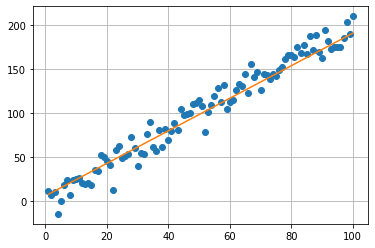

In [604]:
y2 = best_m*x+best_c
plt.plot(x,y,'o')
plt.plot(x,y2)
plt.grid('on')
plt.show()